This document will discuss how to efficiently identify collective variables from unbiased MD trajectories through various dynamical analyses.

Note: Most of the ideas in this notebook is the based on the author's own understanding and experience, if you find anything incorrect, please contact with author. Thanks!

## Projection of Molecular Dynamics

Molecular dynamics (MD) simulations are widely employed to investigate complex dynamical systems, including biomolecular conformational changes, fluid dynamics, and glass dynamics etc. At a certain level of resolution, classical mechanics or Hamiltonian mechanics can effectively describe most dynamical systems. In the context of Hamiltonian mechanics, each state of the system can be viewed as a point in a 6N-dimensional phase space, denoted as $\Gamma=(p^{3N}, q^{3N})$, and the dynamics of the system can be accurately described by the Hamiltonian equations. 

Looking at the system from an ensemble perspective, it can also be characterized by a distribution in phase space, and the evolution of this corresponding distribution also adheres to the Liouville equation:

\begin{equation}
\frac{d\rho}{dt}=\frac{\partial\rho}{\partial t}-\mathscr{L}\rho = 0 \longrightarrow  \rho(t+\Delta t)=e^{\mathscr{L}\Delta t}\rho(t)
\end{equation}

\begin{equation}
\mathscr{L} = \sum_{i}(\frac{\partial \mathbf{\mathscr{H}}}{\partial q_{i}}\frac{\partial}{\partial p_{i}} - \frac{\partial \mathbf{\mathscr{H}}}{\partial p_{i}}{\frac{\partial}{\partial q_{i}}})
\end{equation}

In equilibrium, Liouville operator satisfies the principle of detailed balance (can be proved that Liouville operator is self-adjoint):
\begin{equation}
\mathscr{L}\rho_{eq}(\Gamma)=0
\end{equation}


Phase space is inherently high-dimensional, and as a result, the evolution of dynamical systems within it tends to be exceedingly complicated. The Liouville operator, likewise, is typically complicated, encompassing both slow and fast-evolving kinetics. This complexity is largely depended upon the inherent characteristics of the systems themselves. In the case of biomolecular dynamics, there is a common belief that a few underlying manifolds can effectively describe the system. However, this is evidently not applicable to systems like glass transition. In general, the spectrum of Liouville operator can always be writen in order:

\begin{equation}
\lambda_{1} = 0 \lt \lambda_{2} \le \lambda_{3} \le \cdots \cdots \le \lambda_{k} \ll \lambda_{k+1} \le \cdots \cdots
\end{equation}

and we can always express the evolution of the distribution in term of the eigenvectors of Liouville operator:

\begin{equation}
|\rho(t+\Delta t)\rangle = |\psi_{1}\rangle\langle\phi_{1}|\rho(t)\rangle + \sum_{j=2}|\psi_{j}\rangle e^{\lambda_{j}\Delta t} \langle\phi_{j}|\rho(t)\rangle
\end{equation}

Set the the truncation based on the separation or gap in the spectrum of Liouville operator:
\begin{equation}
|\rho(t+\Delta t)\rangle = \sum_{j=1}^{k}|\psi_{j}\rangle e^{\lambda_{j}\Delta t} \langle\phi_{j}|\rho(t)\rangle + \sum_{j=k+1}|\psi_{j}\rangle e^{\lambda_{j}\Delta t} \langle\phi_{j}|\rho(t)\rangle
\end{equation}
In this case, we exclusively focus on the leading eigenvalues and their associated eigenvectors, which characterize the slow dynamical modes. This choice is justified by the fact that, as time progresses, the smaller eigenvalues rapidly converge to zero. The eigenvectors corresponding to the slow leading eigenvalues hold significant promise as candidate collective variables, particularly because the slowest processes often involve overcoming high free-energy barriers.

To represent the dynamics in a low-dimensional space (collective variables, reaction coordinates) which is spanned by finit basis set: $\{\chi_{1}(\Gamma), \chi_{2}(\Gamma), \cdots, \chi_{n}(\Gamma) \}$, we need to define the projection operator. The general form of projection operator can be written as $\mathbb{P}=|{\mathbf{R}}\rangle \mathbf{S}^{-1}\langle \mathbf{L}|$ where $|\mathbf{R}\rangle = \rho_{eq}[\chi_{1}(\Gamma)\, \chi_{2}(\Gamma), \cdots, \chi_{n}(\Gamma)]$,  $|\mathbf{L}\rangle = [\chi_{1}(\Gamma)\, \chi_{2}(\Gamma), \cdots, \chi_{n}(\Gamma)]$ and $\mathbf{S} = \langle \mathbf{L} | \mathbf{R} \rangle$ is the overlap matrix.

Apply the projection operator on the Liouville equation ($\mathbb{P}+\mathbb{Q} = \mathbb{I}$):
\begin{equation}
\mathbb{P}\rho(t+\Delta t)=\mathbb{P}e^{\mathscr{L}\Delta t}\mathbb{P}\rho(t) + \mathbb{P}e^{\mathscr{L}\Delta t}\mathbb{Q}\rho(t) \\
\mathbb{Q}\rho(t+\Delta t)=\mathbb{Q}e^{\mathscr{L}\Delta t}\mathbb{P}\rho(t) + \mathbb{Q}e^{\mathscr{L}\Delta t}\mathbb{Q}\rho(t)
\end{equation}
The projected dynamics can be decomposited into Markovian term (first term) and non-Markovian term (high-order term):
\begin{equation}
\mathbb{P}\rho(t+\Delta t)=\mathbb{P}e^{\mathscr{L}\Delta t}\mathbb{P}\rho(t) + \mathbb{P}e^{\mathscr{L}\Delta t}\mathbb{Q}e^{\mathscr{L}\Delta t}\mathbb{P}\rho(t-\Delta t) + \cdots \cdots
\end{equation}

One property of projection operator is: $\langle\mathbf{L}|\mathbb{P}\rangle=\langle\mathbf{L}|{\mathbf{R}}\rangle \mathbf{S}^{-1}\langle \mathbf{L}| = \langle\mathbf{L}|$, we can apply left projector on the markovian part of the equation and get:

\begin{equation}
\langle \mathbf{L}|\mathbb{P}\rho(t+\Delta t) \rangle = \langle \mathbf{L}| \mathbb{P}e^{\mathscr{L}\Delta t}\mathbb{P}\rho(t) \rangle \longrightarrow \langle \mathbf{L}|\rho(t+\Delta t) \rangle = \langle \mathbf{L}| e^{\mathscr{L}\Delta t} |{\mathbf{R}}\rangle \mathbf{S}^{-1}\langle \mathbf{L}|\rho(t) \rangle
\end{equation}

In the matrix form:

\begin{gather}
\begin{pmatrix}
\langle \chi_{1} | \rho(t+\Delta t) \rangle \\ \vdots \\ \langle \chi_{n} | \rho(t+\Delta t) \rangle 
\end{pmatrix}
\quad = \quad
\begin{pmatrix}
\langle \chi_{1} | e^{\mathscr{L}\Delta t} |\rho_{eq} \chi_{1} \rangle & \cdots & \langle \chi_{1} | e^{\mathscr{L}\Delta t} |\rho_{eq} \chi_{n} \rangle \\
\vdots & \ddots & \vdots \\
\langle \chi_{n} | e^{\mathscr{L}\Delta t} |\rho_{eq} \chi_{1} \rangle & \cdots & \langle \chi_{n} | e^{\mathscr{L}\Delta t} |\rho_{eq} \chi_{n} \rangle 
\end{pmatrix}
\begin{pmatrix}
\langle \chi_{1} | \rho_{eq} \chi_{1} \rangle & \cdots & \langle \chi_{1} | \rho_{eq} \chi_{n} \rangle \\
\vdots & \ddots & \vdots \\
\langle \chi_{n} | \rho_{eq} \chi_{1} \rangle & \cdots & \langle \chi_{n} | \rho_{eq} \chi_{n} \rangle 
\end{pmatrix}^{-1}
\begin{pmatrix}
\langle \chi_{1} | \rho(t) \rangle \\ \vdots \\ \langle \chi_{n} | \rho(t) \rangle
\end{pmatrix}
\end{gather}


\begin{equation}
\rho_{p}(t+\Delta t) = \mathbf{C}(\Delta t) \mathbf{S}^{-1} \rho_{p}(t)
\end{equation}

where $\mathbf{C}(\Delta t)$ is the time-lagged correlation matrix. $\mathbf{C}(\Delta t) \mathbf{S}^{-1}$ is the normalized time-lagged correlation matrix.


Since we typically cannot obtain the analytical formulas for the Liouville operator or Hamiltonian, the correlation matrix can only be estimated from simulation or observed experimental data (ensemble average can be estimated from trajectory average):
\begin{equation}
\mathbf{C}_{ij}(\Delta t) = \frac{1}{N_{T}-\Delta t}\sum_{i=1}^{N_{T}-\Delta t}\chi_{j}(\Gamma, t)\chi_{i}(\Gamma, t+\Delta t) \\
\mathbf{S}_{ij}(\Delta t) = \frac{1}{N_{T}-\Delta t}\sum_{i=1}^{N_{T}-\Delta t}\chi_{j}(\Gamma, t)\chi_{i}(\Gamma, t)
\end{equation}
It is worth noting that other methods like Maximum Likelihood Estimate (MLE) or Beyesian esimation can also be adopted to construct the correlation matrix. Once we estimate the $\mathbf{C}(\Delta t) \mathbf{S}^{-1}$ and assume the Markovian term is the major contributor for the projected dynamics, we can easily propogator our dynamics by using $\mathbf{C}(\Delta t) \mathbf{S}^{-1}$.

## Variational Approach for Markov Process (VAMP)

To derive representative collective variables from a dynamical system, the usual approach involves obtaining the top eigenvectors of the evolution operator, such as the Liouville operator, probability propagator, or Koopman operator. This is because, during the dynamics propagation using the operator, eigenvectors with small eigenvalues decay rapidly (e.g., $0.1^{10} \approx 0$), while eigenvectors with large eigenvalues survive (e.g., $0.98^{10} \approx 0.82$). However, for the MD simulation, we can only estimate the propagator from simulation data because we do not have any analytical form of Hamiltonian (as shown above).

1. If you utilize all the coordinates and velocities of the atoms in the system, you can construct the evolution propagator in phase space, effectively forming the Liouville operator. However, it's important to note that this is not a wise choice, because this space is typically of high dimensionality (6N), and we often do not need to account for the complete translational and rotational movements of the molecules, nor the full degree of freedom of the solvent.

2. If we embed the molecular conformations obtained from MD simulation with translational and rotational invariant 'features', while simultaneously excluding all solvent degrees of freedom, we can define a subspace within the phase space. These 'features' are typically nonlinear combinations of the original Cartesian coordinates. As demonstrated earlier, the projected dynamics are no longer guaranteed to be linear and Markovian, unless there is a clear temporal separation and we apply a linear transformation to the coordinates.

Then the question becomes how can we get the optimal projected representation (CVs) of true dynamics. The answer is simple:<mark> The leading eigenvectors of evolution operator / propagator give us the best representation.<mark> 

Since we do not know the operator, how can we get the eigenvectors? Inspired from quantum mechanics, a straight forward way is use the linear combination of some basis sets and optimize the combination coefficient. Then we need some criterias to guide the optimization process. Here, we can establish that in the case of a linear propagator-driven Markovian process, the eigenvalues obtained from the approximated eigenvectors (orthogonal from the top eigenvectors) are consistently smaller than the true eigenvalues. This can be understood by considering the variational principle in quantum mechanics.
    
1. If we consider the Liouville operator as the evolution operator, any trial function can be expressed within the space spanned by the eigenfunctions: 
\begin{equation}
\langle f | = \sum_{\alpha} c_{\alpha}\langle \phi_{true, \alpha}| \quad (\sum_{\alpha}c_{\alpha}^{2}=1)
\end{equation}
The variational score could be used to measure how well the trial function describe the dynamics:
\begin{align}
\langle f | e^{\mathscr{L}\Delta t} | f \rangle_{\rho_{eq}} &= \sum_{\alpha}\sum_{\beta}c_{\alpha}c_{\beta} \langle \phi_{true, \alpha} | e^{\mathscr{L}\Delta t} | \phi_{true, \beta}\rangle_{\rho_{eq}} = \sum_{\alpha}\sum_{\beta}c_{\alpha}c_{\beta} \mu_{true,\beta} \langle \phi_{true, \alpha} | \phi_{true, \beta}\rangle_{\rho_{eq}} \\
&=\sum_{\alpha}\sum_{\beta}c_{\alpha}c_{\beta} \mu_{true,\beta} \delta_{\alpha \beta} = \sum_{\alpha}c_{\alpha}^{2}\mu_{true,\alpha} \le \mu_{true,1}
\end{align}

We could do the same derivation so on and so forth with the constraint that low-order trial functions are always orthogonal with the high-order ones.

## time Independent Component Analysis (tICA)

If the embeded features of the system (e.g. for biomolecular system, may chose the pairwise distances, dihedral angles etc.) are used as the basis sets for the projection, the developed algorithm is named as time-Independent Component Analysis (tICA). In contrast to Principal Component Analysis (PCA), which identifies the degree of freedom with the largest variance, tICA selects the degree of freedom with the longest relaxation timescale. Here, first we will review the detailed tICA algorithm. 
1. Mark the MD data as ultidimensional, discrete time-serie $\{|\mathbf{X}_{t}\rangle\}_{t=0}^{N_{t}-1}$, each snapshot is a column vector, of dimension $d$: $\{\chi_{i}\}_{i=1}^{d}$ ,corresponding to an arbitrary, vectorized representation of a protein conformation (features). As usual, we preprocess the data by removing the mean: $|\mathbf{X}_{t}\rangle = |\mathbf{\delta X}_{t}\rangle - \mathbb{E}[|\mathbf{X}_{t}\rangle]$;
2. Under this set of basis functions (features), if we still suppose the feature-based evolution is an good approximation of the original true Markovian dynamics, we can approximate the propagator as $\mathbf{C}(\Delta t) \mathbf{S}^{-1} = \mathbb{E}[|\delta \mathbf{X}_{t}\rangle \langle \delta \mathbf{X}_{t+\Delta}| ] (\mathbb{E}[|\delta \mathbf{X}_{t}\rangle \langle \delta \mathbf{X}_{t}\langle])^{-1}$;
3. Subsequently, by performing an eigen-decomposition of the propagator, we can obtain the top eigenvectors, which naturally serve as the collective variables for the dynamics. One numerical trick to be mindful of is that when calculating the self-correlation matrix $\mathbf{S}$ based on simulation data, certain diagonal elements may become zero, which can pose a challenge when trying to compute the matrix $\mathbf{S}$ inverse. A recommend method is Rao-Blackwellized Ledoit-Wolf shrinkaged estimator (Chen, Yilun, Ami Wiesel, and Alfred O. Hero III. "Shrinkage estimation of high dimensional covariance matrices" ICASSP (2009))

### Use alanine dipeptide dataset as an example, the dataset is downloaded from mdshare package.

In [1]:
conda install mdshare

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda





Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Software\Anaconda\Install

  added / updated specs:
    - mdshare


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mdshare-0.4.2              |   py38haa244fe_3          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          32 KB

The following packages will be UPDATED:

  mdshare                              0.4.2-py38haa244fe_0 --> 0.4.2-py38haa244fe_3 None




mdshare-0.4.2        | 32 KB     |            |   0% 
mdshare-0.4.2        | 32 KB     | #####      |  51% 
mdshare-0.4.2        | 32 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Retrieving notices: ...working... done


In [5]:
import mdshare
import numpy as np

local_filename = mdshare.fetch('alanine-dipeptide-3x250ns-backbone-dihedrals.npz')
with np.load(local_filename) as fh:
    dihedrals_trajs = [fh[key] for key in sorted(fh.keys())]
dihedrals_trajs = np.concatenate(dihedrals_trajs)
local_filename = mdshare.fetch('alanine-dipeptide-3x250ns-heavy-atom-distances.npz')
with np.load(local_filename) as fh:
    distance_trajs = [fh[key] for key in sorted(fh.keys())]

In [6]:
# Author: Yunrui Qiu <yunruiqiu@gmail.com>

import numpy as np
from tqdm import trange, tqdm
import scipy.linalg
import warnings
import os


class correlation_matrix(object):

    def __init__(self, lagtime=100, reverse=True, shrinkage=None):
        self.__num_sequence = 0
        self.__num_datapoints = 0
        self.__num_features = None
        self.__reverse = reverse
        self.__shrinkage = shrinkage
        self._lagtime = lagtime
        self._c00 = None; self._c0t = None; self._ctt = None
        self._mean0 = None; self._meant = None; self._mean_all = None
        self._covariance = None
        self._timelagged_covariance = True

    
    @property
    def covariance_matrix(self):
        return self._covariance
    
    @property
    def timelagged_covariance(self):
        return self._timelagged_covariance
    
    @property
    def c00(self):
        return self._c00
    
    @property
    def c0t(self):
        return self._c0t
    
    @property
    def ctt(self):
        return self._ctt
    
    @property
    def mean(self):
        return self._mean_all
    

    def _fit(self, data):

        self.__num_sequence += 1
        self.__num_datapoints += data.shape[0]
        if self.__num_features == None:
            self.__num_features = data.shape[1]
        else:
            assert data.shape[1] == self.__num_features, "The number of features for the sequences is not consistent: {} != {}.".format(data.shape[1], self.__num_features)
        
        if data.shape[0] <= self._lagtime:
            warnings.warn("The length of the data is shorter than the lagtime: {} < {}.".format(data.shape[0], self._lagtime))
        
        if self._c00 is None and self._c0t is None and self._ctt is None:
            self._c00 = np.zeros((self.__num_features, self.__num_features))
            self._c0t = np.zeros((self.__num_features, self.__num_features))
            self._ctt = np.zeros((self.__num_features, self.__num_features))
            self._mean0 = np.zeros(self.__num_features)
            self._meant = np.zeros(self.__num_features)
            self._mean_all = np.zeros(self.__num_features)

        self._c00 += np.dot(data[:-self._lagtime].T, data[:-self._lagtime])
        self._ctt += np.dot(data[self._lagtime:].T, data[self._lagtime:])
        self._c0t += np.dot(data[:-self._lagtime].T, data[self._lagtime:])
        self._mean0 += np.sum(data[:-self._lagtime], axis=0)
        self._meant += np.sum(data[self._lagtime:], axis=0)
        self._mean_all += np.sum(data, axis=0)
    

    @staticmethod
    def rao_blackwell_ledoit_wolf(covmatrix, num_data):
        """
        Rao-Blackwellized Ledoit-Wolf shrinkaged estimator of the covariance matrix.
        [1] Chen, Yilun, Ami Wiesel, and Alfred O. Hero III. "Shrinkage
        estimation of high dimensional covariance matrices" ICASSP (2009)
        This part is inspired by MSMBuilder 2022;
        """
        matrix_dim = covmatrix.shape[0]
        assert covmatrix.shape == (matrix_dim, matrix_dim), "The input covariance matrix does not have the squared shape;"

        alpha = (num_data-2)/(num_data*(num_data+2))
        beta = ((matrix_dim+1)*num_data - 2) / (num_data*(num_data+2))

        trace_covmatrix_squared = np.sum(covmatrix*covmatrix) 
        U = ((matrix_dim * trace_covmatrix_squared / np.trace(covmatrix)**2) - 1)
        rho = min(alpha + beta/U, 1)

        F = (np.trace(covmatrix) / matrix_dim) * np.eye(matrix_dim)
        return (1-rho)*covmatrix + rho*F, rho


    def fit(self, traj):

        for i in tqdm(range(len(traj)), desc="Fit correlation matrix"):
            self._fit(traj[i])
        average_num = (self.__num_datapoints - self._lagtime * self.__num_sequence)
        self._mean0 /= float(average_num); self._meant /= float(average_num)
        self._mean_all /= self.__num_datapoints
        if self.__reverse:

            self._covariance =  (self._c00 + self._ctt) / 2 / float(average_num) - np.outer((self._mean0+self._meant)/2, (self._mean0+self._meant)/2)
            self._timelagged_covariance = (self._c0t + self._c0t.T) / 2 / float(average_num) - np.outer((self._mean0+self._meant)/2, (self._mean0+self._meant)/2)

            self._c00 = (self._c00) / float(average_num) - np.outer(self._mean0, self._mean0)
            self._c0t = (self._c0t) / float(average_num) - np.outer(self._mean_all, self._mean_all)
            self._ctt = (self._ctt) /float(average_num) - np.outer(self._meant, self._meant)

            
        else:
            self._c00 = (self._c00) / float(average_num) - np.outer(self._mean0, self._mean0)
            self._c0t = (self._c0t) / float(average_num) - np.outer(self._mean0, self._meant)
            self._ctt = (self._ctt) / float(average_num) - np.outer(self._meant, self._meant)

            self._covariance = (self._c00 + self._ctt) / 2
            self._timelagged_covariance = self._c0t.copy()


        if self.__shrinkage is None:
            self._covariance, self.shrinkage = self.rao_blackwell_ledoit_wolf(self._covariance, self.__num_datapoints)
        else:
            self.shrinkage = self.__shrinkage
            F = (np.trace(self._covariance)/self.__num_features) * np.eye(self.__num_features)
            self._covariance = (1-self.shrinkage)*self._covariance + self.shrinkage*F



class tICA(object):

    def __init__(self, num_components=None, lagtime=100, shrinkage=0.01):
        
        self.__shrinkage = shrinkage
        self._num_components = num_components
        self._lagtime = lagtime
        self._num_features = None
        self._mean = None
        self._eigenvalues = None
        self._eigenvectors = None
        self._components = None
        
    @property
    def component(self):
        return self._components


    def fit(self, trajs):

        correlationmatrix = correlation_matrix(lagtime=self._lagtime, reverse=True, shrinkage=self.__shrinkage)
        correlationmatrix.fit(trajs)
        covariance_matrix = correlationmatrix.covariance_matrix 
        timelagged_matrix = correlationmatrix.timelagged_covariance
        self._mean = correlationmatrix.mean
                                                 
        self._num_features = timelagged_matrix.shape[0]

        eigenvals, eigenvecs = scipy.linalg.eigh(timelagged_matrix, b=covariance_matrix, eigvals=(self._num_features-self._num_components, self._num_features-1))
        idx_order = np.argsort(eigenvals)[::-1]
        self._eigenvalues = eigenvals[idx_order]
        self._eigenvectors = eigenvecs[:, idx_order]
        self._components = self._eigenvectors[:, 0:self._num_components]
        return self

    def transform(self, data):
        
        transform_data = []
        for i in range(len(data)):
            transform_data.append(np.dot((data[i]-self._mean), self._components))
        return transform_data

Clearly, there are two hyperparameters to consider: the number of collective variables and the lag time for constructing the time-lagged correlation matrix in the tICA model. It's important to note that various criteria are available to guide the adjustment of these hyperparameters, such as the Generalized Matrix Rayleigh Quotient (GMRQ) score or the VAMP-2 score, which can assist in cross-validating our fitted projection model.

Fit correlation matrix: 100%|████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.87it/s]
<ipython-input-7-fbbd56d0dd32>:18: RuntimeWarning: divide by zero encountered in log
  RC_G=-np.log(RC_counts)*THERMO_CONSTANT*300
<ipython-input-7-fbbd56d0dd32>:29: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(_x, _y, RC_G.transpose(),levels=15, colors='black', vmin=0, vmax=6, linewidth=0.5)


Text(0, 0.5, 'collective variable 2')

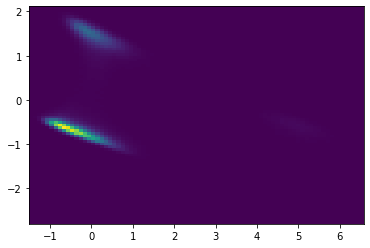

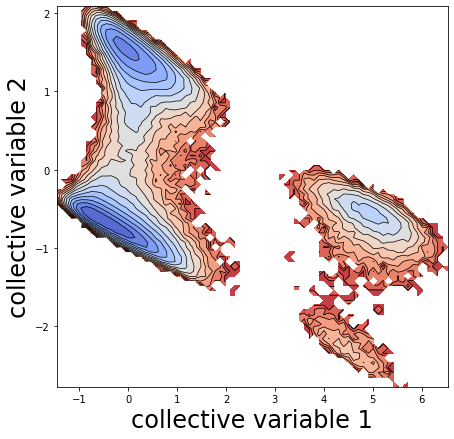

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.constants import Avogadro, Boltzmann, calorie_th
%matplotlib inline

tica = tICA(num_components=3, lagtime=40)
tica.fit(distance_trajs)
project_trajs = tica.transform(distance_trajs)


project = np.concatenate(project_trajs)
THERMO_CONSTANT = 10**-3 * Boltzmann * Avogadro / calorie_th

RC_counts,RC_xbins,RC_ybins,images = plt.hist2d(project[:,0],project[:,1],bins=80)
RC_counts[RC_counts==0]=0
RC_G=-np.log(RC_counts)*THERMO_CONSTANT*300
RC_G=RC_G-np.nanmin(RC_G)

_x = np.zeros(len(RC_xbins)-1); _y = np.zeros(len(RC_ybins)-1)
for i in range(len(RC_xbins)-1):
    _x[i] = (RC_xbins[i] + RC_xbins[i+1]) / 2
    _y[i] = (RC_ybins[i] + RC_ybins[i+1]) / 2

fig,ax = plt.subplots(1, 1, figsize=(7,7))    
plt.contourf(_x, _y,RC_G.transpose(),levels=15, cmap='coolwarm', vmin=0, vmax=6, alpha=0.9)
plt.rcParams["lines.linewidth"]=0.7
plt.contour(_x, _y, RC_G.transpose(),levels=15, colors='black', vmin=0, vmax=6, linewidth=0.5)
plt.xlabel("collective variable 1",fontsize=24)
plt.ylabel("collective variable 2",fontsize=24)

Following the projection, we have identified four basins, each corresponding to a major conformation of alanine dipeptide.

Once we obtain the projection, we can color the conformations based on their projected coordinate values, allowing us to visualize the 'transition modes' of the dynamical system. Additionally, we can plot the conformations using interpretable coordinates to enhance our understanding of the system. In the case of alanine dipeptide, the Ramachandran angles $\phi$ and $\psi$ effectively capture the most significant conformational changes. As shown below, we have visualized the top three transition modes. However, it seems that the modes are not distinct, particularly the third one, which appears to be a mixture of various modes.

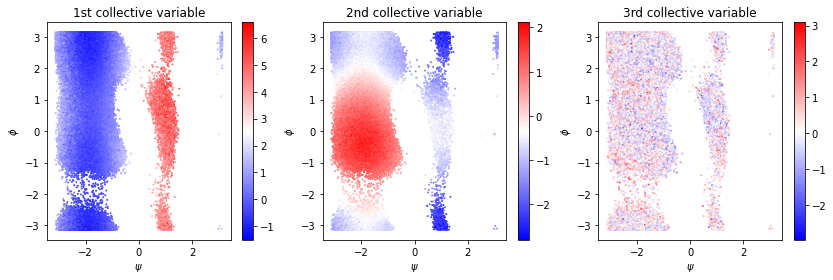

In [10]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.scatter(dihedrals_trajs[:, 0], dihedrals_trajs[:, 1], c=project[:, 0], s=1, cmap='bwr')
plt.title("1st collective variable")
plt.xlabel("$\psi$")
plt.ylabel("$\phi$")
plt.colorbar()

plt.subplot(1, 3, 2)
plt.scatter(dihedrals_trajs[:, 0], dihedrals_trajs[:, 1], c=project[:, 1], s=1, cmap='bwr')
plt.title("2nd collective variable")
plt.xlabel("$\psi$")
plt.ylabel("$\phi$")
plt.colorbar()

plt.subplot(1, 3, 3)
plt.scatter(dihedrals_trajs[:, 0], dihedrals_trajs[:, 1], c=project[:, 2], s=1, cmap='bwr')
plt.title("3rd collective variable")
plt.xlabel("$\psi$")
plt.ylabel("$\phi$")
plt.colorbar()

## state-free reversible VAMPnets (SRVnet) (J. Chem. Phys. 150, 214114 (2019))

Previously, we demonstrated the use of linear combinations of input features to approximate the eigenvectors of the evolution propagator (under Markovian assumption). It is evident that a significant improvement can be achieved by transitioning from linear combinations to non-linear transformations. One popular approach for introducing nonlinear transformations is by employing deep neural networks. Notably, state-free reversible VAMPnets have been developed for this purpose. The underlying idea for SRVnet is as same as tICA, inspired by the variational principle. 

As a result, the SRVnet employs an encoder neural network to transform high-dimensional feature-based trajectories into a low-dimensional representation. The network is optimized using a loss function based on the maximization of the leading eigenvalues of the self-correlation weighted time-lagged correlation matrix (based on variational principle).

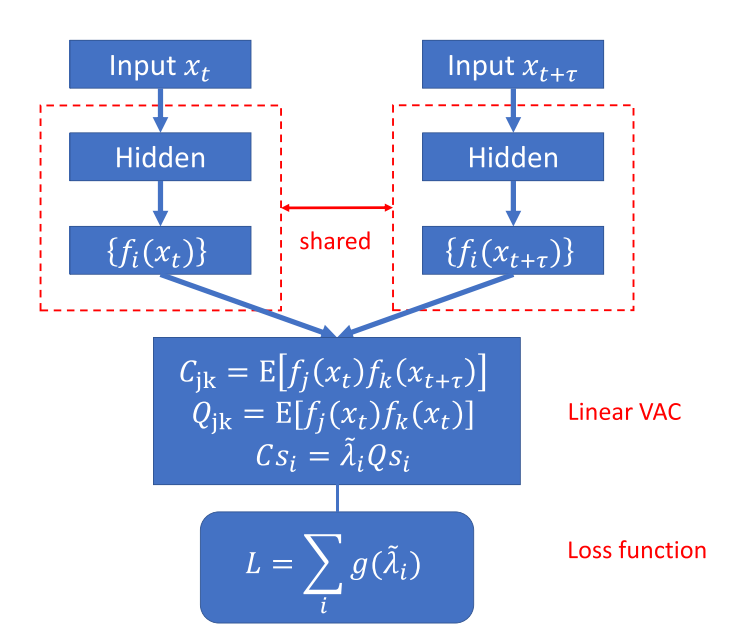

In [1]:
# Author: Yunrui Qiu <yunruiqiu@gmail.com>


import numpy as np
import torch
import os
from tqdm import trange, tqdm
import scipy.linalg
from copy import deepcopy
import random

def TimeLaggedDataset(trajs=None, lagtime=100, normalize=False, mean=None, std=None):

    _pastdata = None; _futuredata = None
    for i in tqdm(range(len(trajs)), desc='load data'):
        for j in range(len(trajs[i])-int(lagtime)):
            if _pastdata != None and _futuredata != None:
                _pastdata.append(trajs[i][j])
                _futuredata.append(trajs[i][j+lagtime])
            else:
                _pastdata = [trajs[i][j]]
                _futuredata = [trajs[i][int(j+lagtime)]]
    _pastdata = np.array(_pastdata); _futuredata = np.array(_futuredata)
    if  normalize:
        if not mean == None and not std == None:
            past_mean = mean; future_mean = mean 
            past_std = std; future_std = std
        else:
            past_mean = np.mean(_pastdata, axis=0); future_mean = np.mean(_futuredata, axis=0)
            past_std = np.std(_pastdata, axis=0); future_std = np.std(_futuredata, axis=0)
        _pastdata -= past_mean[None, :]; _pastdata /= past_std[None, :]
        _futuredata -= future_mean[None, :]; _futuredata /= future_std[None, :]
    _pastdata.astype(np.float32); _futuredata.astype(np.float32)
    _pastdata = torch.from_numpy(_pastdata); _futuredata = torch.from_numpy(_futuredata)
    return _pastdata, _futuredata


def split_train_validate_data(pastdata, futuredata, validation_ratio=0.1, train_batchsize=10000):

    assert pastdata.shape == futuredata.shape, "The pastdata and futuredata should share the same shape."
    dataset = []
    for i in range(len(pastdata)):
        dataset.append((pastdata[i], futuredata[i]))
    train_set, validate_set = torch.utils.data.random_split(dataset, [len(dataset)-int(len(dataset)*validation_ratio), int(len(dataset)*validation_ratio)])
    train_loader = torch.utils.data.dataloader.DataLoader(train_set, batch_size=train_batchsize, shuffle=False)
    validate_loader = torch.utils.data.dataloader.DataLoader(validate_set, batch_size=int(len(validate_set)*0.2), shuffle=False)
    return train_loader, validate_loader


def rao_blackwell_ledoit_wolf(covmatrix=None, num_data=None):
    matrix_dim = covmatrix.shape[0]
    assert covmatrix.shape == (matrix_dim, matrix_dim), "The input covariance matrix does not have the squared shape;"

    alpha = (num_data-2)/(num_data*(num_data+2))
    beta = ((matrix_dim+1)*num_data - 2) / (num_data*(num_data+2))

    trace_covmatrix_squared = torch.sum(covmatrix*covmatrix)  
    U = ((matrix_dim * trace_covmatrix_squared / torch.trace(covmatrix)**2) - 1)
    rho = min(alpha + beta/U, 1)

    F = (torch.trace(covmatrix) / matrix_dim) * torch.eye(matrix_dim).to(device=covmatrix.device)
    return (1-rho)*covmatrix + rho*F, rho


def covariance(pastdata=None, futuredata=None, remove_mean=True):

    assert pastdata.shape == futuredata.shape, "pastdata and future mush share the same shape"
    if remove_mean:
        pastdata = pastdata - torch.mean(pastdata, dim=0)
        futuredata = futuredata - torch.mean(futuredata, dim=0)
    
    c00 = torch.matmul(pastdata.t(), pastdata) / (pastdata.shape[0] - 1)
    ctt = torch.matmul(futuredata.t(), futuredata) / (futuredata.shape[0] -1)
    c0t = torch.matmul(pastdata.t(), futuredata) / (pastdata.shape[0] - 1)
    
    c00, _ = rao_blackwell_ledoit_wolf(covmatrix=c00, num_data=pastdata.shape[0])
    ctt, _ = rao_blackwell_ledoit_wolf(covmatrix=ctt, num_data=futuredata.shape[0])
    return c00, c0t, ctt


def matrix_decomposition(matrix=None, epsilon=1e-6, method='regularize'):

    methods = ['regularize', 'cutoff', 'clamp']
    assert method in methods, "Invalid method "+str(method)+", should use methods from "+str(methods)

    _matrix = matrix + torch.eye(matrix.shape[0]) * epsilon
    eigenval, eigenvec = torch.linalg.eigh(_matrix)
    eigenvec = eigenvec.t()

    if method == "regularize":
        eigenval = torch.abs(eigenval)
#         eigenvec = torch.abs(eigenvec)
    elif method == "cutoff":
        _mask = eigenval > epsilon
        eigenval = eigenval[_mask]
        eigenvec = eigenvec[_mask]
    elif method == "clamp":
        eigval = torch.clamp_min(eigval, min=epsilon)
    return eigenval, eigenvec


def matrix_inverse(matrix=None, sqrt_root=False, epsilon=1e-6, method='regularize'):

    eigenval, eigenvec = matrix_decomposition(matrix=matrix, epsilon=epsilon, method=method)
    if not sqrt_root:
        _inv_matrix = torch.matmul(eigenvec.t(), torch.matmul(torch.diag(1 / eigenval), eigenvec))
    else:
        _inv_matrix = torch.matmul(eigenvec.t(), torch.matmul(torch.diag(1 / torch.sqrt(eigenval)), eigenvec))
    return _inv_matrix


def reverse_propogator(pastdata=None, futuredata=None, epsilon=1e-6, method='cutoff'):

    c00, c0t, ctt = covariance(pastdata=pastdata, futuredata=futuredata, remove_mean=True)
    _, ct0, _ = covariance(pastdata=futuredata, futuredata=pastdata, remove_mean=True)
    
    c0 = (c00 + ctt) / 2
    ct = (c0t + ct0) / 2

    _lower_triangle = torch.linalg.cholesky(c0)
    _lower_triangle_inv = torch.inverse(_lower_triangle)
    _reverse_propogator = torch.matmul(_lower_triangle_inv, torch.matmul(ct, _lower_triangle_inv.t()))

    return _reverse_propogator


def loss_function(pastdata=None, futuredata=None):
    
    rev_propogator = reverse_propogator(pastdata=pastdata, futuredata=futuredata, epsilon=0, method='regularize')
    _eigenval, _ = torch.linalg.eigh(rev_propogator)
    _score = torch.sum(torch.pow(_eigenval, 2)) + 1
    return -1. * _score


class srvnet(object):

    def __init__(self, lobe=None, device=torch.device("cpu"), learning_rate=1e-4, optimizer=None):
        self._lobe = lobe
        self._device = device
        self._learning_rate = learning_rate
        self._optimizer = optimizer
        self.__step = 0
        if optimizer == None:
            self._optimizer = torch.optim.Adam(self._lobe.parameters(), lr=self._learning_rate)
        self._srvnet_train_eigenvals = []
        self._srvnet_validate_eigenvals = []
        self._normal_mean = None
        self._normal_eigenvecs = None
        self._train_scores = []
        self._validation_score = []
        
    @property
    def lobe(self):
        return self._lobe
    

    @lobe.setter
    def lobe(self, network):
        self._lobe = network
        self._lobe = self._lobe.to(device=self._device)

    def _normalize(self, dataloader):

        with torch.no_grad():
            __pastdata = None; __futuredata = None
            for __past_data, __future_data in dataloader:
                if __pastdata != None and __futuredata != None:
                    __past_data = __past_data.to(self._device); __future_data = __future_data.to(self._device); 
                    __pastdata = torch.cat((__pastdata, self.lobe(__past_data)), dim=0)
                    __futuredata = torch.cat((__futuredata, self.lobe(__future_data)), dim=0)
                else:
                    __past_data = __past_data.to(self._device); __future_data = __future_data.to(self._device); 
                    __pastdata = self.lobe(__past_data); __futuredata = self.lobe(__future_data)

            pastmean = torch.mean(__pastdata, dim=0); futuremean = torch.mean(__futuredata, dim=0)
            mean = ((pastmean + futuremean) / 2).detach().cpu().numpy()
            c00, c0t, ctt = covariance(pastdata=__pastdata, futuredata=__futuredata, remove_mean=True)
            _, ct0, ctt = covariance(pastdata=__futuredata, futuredata=__pastdata, remove_mean=True)

            c0 = (c00 + ctt) / 2
            ct = (c0t + ct0) / 2

            c0 = c0.cpu().numpy(); ct = ct.cpu().numpy()
            eigenval, eigenvecs = scipy.linalg.eigh(ct, b=c0)
            index = np.argsort(eigenval)[::-1]
            eigenval = eigenval[index]
            eigenvecs = eigenvecs[:,index]
        return mean, eigenvecs


    def partial_fit(self, pastdata, futuredata):
        
        assert pastdata.shape == futuredata.shape, "Input pastdata and futuredata should share the same shape: "+ str(pastdata.shape) + "!=" + str(futuredata.shape)
        self._lobe.train()
        if isinstance(pastdata, np.ndarray):
            pastdata = torch.from_numpy(pastdata.astype(np.float32))
        if isinstance(futuredata, np.ndarray):
            pastdata = torch.from_numpy(futuredata.astype(np.float32))
        pastdata = pastdata.to(device=self._device); futuredata = futuredata.to(device=self._device)
        
        self._optimizer.zero_grad()
        _pastproject = self._lobe(pastdata); _futureproject = self._lobe(futuredata)
            
        _loss = loss_function(pastdata=_pastproject, futuredata=_futureproject)
        _loss.backward()
        self._optimizer.step()
        self._train_scores.append((self.__step, (-_loss).item()))

        rev_propogator = reverse_propogator(pastdata=_pastproject, futuredata=_futureproject)
        _eigenval, _ = torch.linalg.eigh(rev_propogator)
        self._srvnet_train_eigenvals.append((self.__step, torch.flip(_eigenval[-int(_pastproject.shape[1]):], dims=[0]).detach().cpu().numpy()))
        self.__step +=1

        return self
    

    def validate(self, validation_past, validation_future):

        self._lobe.eval()

        if isinstance(validation_past, np.ndarray):
            validation_past = torch.from_numpy(validation_past.astype(np.float32))
        if isinstance(validation_future, np.ndarray):
            validation_future = torch.from_numpy(validation_future.astype(np.float32))
        validation_past = validation_past.to(device=self._device)
        validation_future = validation_future.to(device=self._device)
        with torch.no_grad():
            _val_pastproject = self._lobe(validation_past)
            _val_futureproject = self._lobe(validation_future)
            
            _val_score = loss_function(pastdata=_val_pastproject, futuredata=_val_futureproject)
            rev_propogator = reverse_propogator(pastdata=_val_pastproject, futuredata=_val_futureproject)
            _eigenval, _ = torch.linalg.eigh(rev_propogator)
            _eigenval = torch.flip(_eigenval[-int(_val_pastproject.shape[1]):], dims=[0]).detach()
            return -_val_score.item(), _eigenval.cpu().numpy()
    


    def fit(self, train_loader, num_epochs=1, validation_loader=None):

        self.__step = 0

        for epoch in range(num_epochs):

            for pastdata, futuredata in train_loader:
                self.partial_fit(pastdata=pastdata.to(device=self._device), futuredata=futuredata.to(self._device))
            print("==>epoch={}, training process={:.2f}%, the training loss function={}, eigenvalues:{};".format(epoch, 100*(epoch+1)/num_epochs, self._train_scores[-1][1], self._srvnet_train_eigenvals[-1][1]))
            
            if not validation_loader == None:
                validation_score = []; validation_eigenval = []
                for val_pastdata, val_futuredata in validation_loader:
                    score, eigenval = self.validate(validation_past=val_pastdata, validation_future=val_futuredata)
                    validation_score.append(score); validation_eigenval.append(eigenval)
                validation_score = torch.Tensor(validation_score)
                self._validation_score.append((self.__step, torch.mean(validation_score).item()))
                if len(validation_eigenval) != 0:
                    validation_eigenval = np.array(validation_eigenval)
                    validation_eigenval = torch.Tensor(validation_eigenval)
                    self._srvnet_validate_eigenvals.append((self.__step, torch.mean(validation_eigenval, dim=0)))
                print("==>epoch={}, training process={:.2f}%, the validation loss function={};".format(epoch, 100*(epoch+1)/num_epochs, self._validation_score[-1][1]))
        
        self._normal_mean, self._normal_eigenvecs = self._normalize(dataloader=train_loader)
        return self

    def transform(self, data, instantaneous=True):
        net = deepcopy(self.lobe); net.eval()
        project_data = []
        for _data in map_data(data=data, device=self._device):
            project_data.append(net(_data).detach().cpu().numpy())
        output = []
        for i in range(len(project_data)):
            _output = np.dot((project_data[i]-self._normal_mean), self._normal_eigenvecs)
            output.append(_output)
        return output if len(output) > 1 else output[0]

In [ ]:
import mdshare

local_filename = mdshare.fetch('alanine-dipeptide-3x250ns-heavy-atom-distances.npz')
with np.load(local_filename) as fh:
    distance_trajs = [fh[key] for key in sorted(fh.keys())]
    
past, future = TimeLaggedDataset(trajs=distance_trajs, lagtime=1, normalize=False)

train_loader, validation_loader =  split_train_validate_data(pastdata=past, futuredata=future, validation_ratio=0.1, train_batchsize=10000)

if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.backends.cudnn.benchmark = True
else:
    device = torch.device("cpu")

network_lobe = torch.nn.Sequential(
    torch.nn.BatchNorm1d(45),
    torch.nn.Linear(45, 45), torch.nn.ELU(),
    torch.nn.Linear(45, 45), torch.nn.ELU(),
    torch.nn.Linear(45, 20), torch.nn.ELU(),
    torch.nn.Linear(20, 10), torch.nn.ELU(),
    torch.nn.Linear(10, 3)
)
network_lobe = network_lobe.to(device=device)
projector = srvnet(lobe=network_lobe, learning_rate=1e-3, device=device)
projector.optimizer = torch.optim.Adam(network_lobe.parameters(), lr=1e-2, weight_decay=1e-6)
projector.fit(train_loader=train_loader, num_epochs=10, validation_loader=validation_loader)

output_trajs = projector.transform(data=distance_trajs)

load data: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.65it/s]


==>epoch=0, training process=10.00%, the training loss function=3.2541260719299316, eigenvalues:[0.97243786 0.9659865  0.6126671 ];
==>epoch=0, training process=10.00%, the validation loss function=3.278470277786255;
==>epoch=1, training process=20.00%, the training loss function=3.307892084121704, eigenvalues:[0.98415077 0.97161883 0.6287259 ];
==>epoch=1, training process=20.00%, the validation loss function=3.268711805343628;
==>epoch=2, training process=30.00%, the training loss function=3.33426570892334, eigenvalues:[0.9909606  0.97449183 0.6345301 ];
==>epoch=2, training process=30.00%, the validation loss function=3.2500228881835938;
==>epoch=3, training process=40.00%, the training loss function=3.3465237617492676, eigenvalues:[0.9925767 0.9779766 0.6362994];
==>epoch=3, training process=40.00%, the validation loss function=3.256821870803833;
==>epoch=4, training process=50.00%, the training loss function=3.3520402908325195, eigenvalues:[0.99347776 0.9778469  0.6394197 ];
==>ep

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.constants import Avogadro, Boltzmann, calorie_th
%matplotlib inline


project = np.concatenate(output_trajs)
THERMO_CONSTANT = 10**-3 * Boltzmann * Avogadro / calorie_th

RC_counts,RC_xbins,RC_ybins,images = plt.hist2d(project[:,0],project[:,1],bins=80)
RC_counts[RC_counts==0]=0
RC_G=-np.log(RC_counts)*THERMO_CONSTANT*300
RC_G=RC_G-np.nanmin(RC_G)

_x = np.zeros(len(RC_xbins)-1); _y = np.zeros(len(RC_ybins)-1)
for i in range(len(RC_xbins)-1):
    _x[i] = (RC_xbins[i] + RC_xbins[i+1]) / 2
    _y[i] = (RC_ybins[i] + RC_ybins[i+1]) / 2

fig,ax = plt.subplots(1, 1, figsize=(7,7))    
plt.contourf(_x, _y,RC_G.transpose(),levels=15, cmap='coolwarm', vmin=0, vmax=6, alpha=0.9)
plt.rcParams["lines.linewidth"]=0.7
plt.contour(_x, _y, RC_G.transpose(),levels=15, colors='black', vmin=0, vmax=6, linewidth=0.5)
plt.xlabel("collective variable 1",fontsize=24)
plt.ylabel("collective variable 2",fontsize=24)

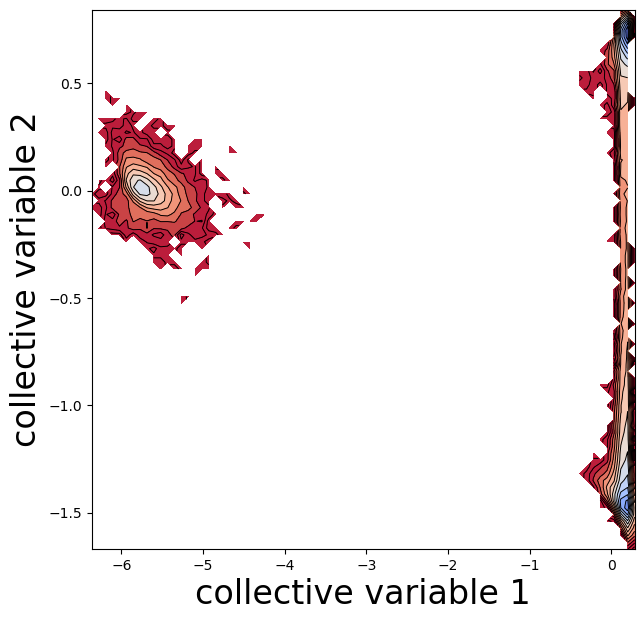

In [ ]:
local_filename = mdshare.fetch('alanine-dipeptide-3x250ns-backbone-dihedrals.npz')
with np.load(local_filename) as fh:
    dihedrals_trajs = [fh[key] for key in sorted(fh.keys())]
dihedrals_trajs = np.concatenate(dihedrals_trajs)


plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.scatter(dihedrals_trajs[:, 0], dihedrals_trajs[:, 1], c=project[:, 0], s=1, cmap='bwr', vmax=0.3, vmin=-0.3)
plt.title("1st collective variable")
plt.xlabel("$\psi$")
plt.ylabel("$\phi$")
plt.colorbar()

plt.subplot(1, 3, 2)
plt.scatter(dihedrals_trajs[:, 0], dihedrals_trajs[:, 1], c=project[:, 1], s=1, cmap='bwr', vmax=1, vmin=-1)
plt.title("2nd collective variable")
plt.xlabel("$\psi$")
plt.ylabel("$\phi$")
plt.colorbar()

plt.subplot(1, 3, 3)
plt.scatter(dihedrals_trajs[:, 0], dihedrals_trajs[:, 1], c=project[:, 2], s=1, cmap='bwr', vmax=1.5, vmin=-1.5)
plt.title("3rd collective variable")
plt.xlabel("$\psi$")
plt.ylabel("$\phi$")
plt.colorbar()

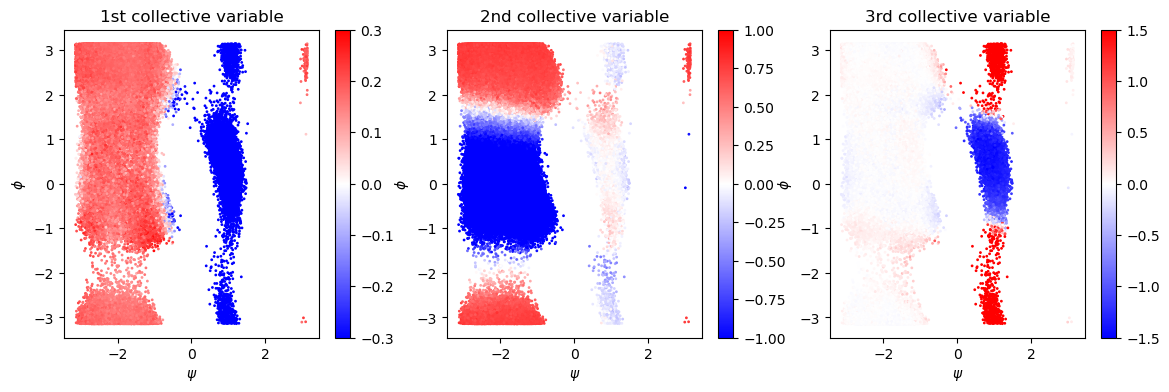

Clearly, the projection and the transition modes are significantly clearer than the results obtained using tICA. The associated biological implications are also more apparent. Personally, I have utilized this network to analyze a variety of systems, including some that are highly complex, and the performance is generally quite satisfactory.